In [3]:

# Let's fetch some fundamental-related data about publicly traded stocks/corporations

import requests
from bs4 import BeautifulSoup
from pandas import DataFrame
import itertools
import numpy as np
from itertools import chain
import pandas as pd


url_base = "https://finviz.com/quote.ashx?t="

tckr = ['AXP','AMGN','AAPL','BA','CAT','CSCO','CVX','GS','HD','HON','IBM','INTC','JNJ','KO','JPM','MCD','MMM','MRK','MSFT','NKE','PG','TRV','UNH','CRM','VZ','V','WBA','WMT','DIS']
        
i = 1

url_list = [(s, url_base + s) for s in tckr]
data_list = []

headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:76.0) Gecko/20100101 Firefox/76.0'}

for t, url in url_list:
    print(i)
    i = i + 1
    print(t, url)
    print('Scrapping ticker {}...'.format(t))
    soup = BeautifulSoup(requests.get(url, headers=headers).content, 'html.parser')
    #writer.writerow([t])
    l = []
    for row in soup.select('.snapshot-table2 tr'):
        l.append([td.text for td in row.select('td')])
        x = list(chain.from_iterable(l))
        d = dict(zip(x[::2], x[1::2]))
        d['Index'] = t
        
    data_list.append(d)


df = pd.DataFrame(data_list)


1
AXP https://finviz.com/quote.ashx?t=AXP
Scrapping ticker AXP...
2
AMGN https://finviz.com/quote.ashx?t=AMGN
Scrapping ticker AMGN...
3
AAPL https://finviz.com/quote.ashx?t=AAPL
Scrapping ticker AAPL...
4
BA https://finviz.com/quote.ashx?t=BA
Scrapping ticker BA...
5
CAT https://finviz.com/quote.ashx?t=CAT
Scrapping ticker CAT...
6
CSCO https://finviz.com/quote.ashx?t=CSCO
Scrapping ticker CSCO...
7
CVX https://finviz.com/quote.ashx?t=CVX
Scrapping ticker CVX...
8
GS https://finviz.com/quote.ashx?t=GS
Scrapping ticker GS...
9
HD https://finviz.com/quote.ashx?t=HD
Scrapping ticker HD...
10
HON https://finviz.com/quote.ashx?t=HON
Scrapping ticker HON...
11
IBM https://finviz.com/quote.ashx?t=IBM
Scrapping ticker IBM...
12
INTC https://finviz.com/quote.ashx?t=INTC
Scrapping ticker INTC...
13
JNJ https://finviz.com/quote.ashx?t=JNJ
Scrapping ticker JNJ...
14
KO https://finviz.com/quote.ashx?t=KO
Scrapping ticker KO...
15
JPM https://finviz.com/quote.ashx?t=JPM
Scrapping ticker JPM...
16
M

,Index,P/E,EPS (ttm),Insider Own,Shs Outstand,Perf Week,Market Cap,Forward P/E,EPS next Y,Insider Trans,...,Earnings,Payout,Avg Volume,Price,Recom,SMA20,SMA50,SMA200,Volume,Change
0,AXP,17.63,10.67,0.12%,743.00M,3.86%,137.00B,15.18,10.00%,-3.46%,...,Jan 26 BMO,21.14%,2.98M,187.99,2.13,1.40%,7.31%,14.85%,"811,133",1.36%
1,AMGN,21.90,14.06,0.22%,534.00M,1.29%,164.84B,15.39,7.78%,-1.81%,...,Feb 06 AMC,64.07%,2.42M,308.01,2.15,2.54%,9.06%,20.54%,"544,988",-0.61%
2,AAPL,31.91,6.13,0.09%,15.55B,7.08%,3024.58B,27.36,8.52%,-4.49%,...,Feb 01 AMC,15.32%,54.27M,195.62,2.11,3.97%,2.80%,7.81%,"20,321,895",0.22%
3,BA,-,-4.69,0.16%,604.98M,4.95%,128.93B,51.98,168.87%,-0.78%,...,Jan 31 BMO,-,8.21M,213.11,1.62,-8.84%,-8.23%,-0.57%,"7,350,645",0.76%
4,CAT,16.55,17.66,0.23%,516.35M,4.85%,148.73B,14.23,-0.68%,-4.19%,...,Feb 05 BMO,37.26%,3.20M,292.15,2.48,0.75%,7.70%,14.75%,"841,849",1.15%


In [5]:

# Here are all the columns of the dataframe that we just created.

print(df.columns)
df.head()


Index(['Index', 'P/E', 'EPS (ttm)', 'Insider Own', 'Shs Outstand', 'Perf Week',
       'Market Cap', 'Forward P/E', 'EPS next Y', 'Insider Trans', 'Shs Float',
       'Perf Month', 'Income', 'PEG', 'EPS next Q', 'Inst Own',
       'Short Float / Ratio', 'Perf Quarter', 'Sales', 'P/S', 'EPS this Y',
       'Inst Trans', 'Short Interest', 'Perf Half Y', 'Book/sh', 'P/B', 'ROA',
       'Target Price', 'Perf Year', 'Cash/sh', 'P/C', 'EPS next 5Y', 'ROE',
       '52W Range', 'Perf YTD', 'Dividend', 'P/FCF', 'EPS past 5Y', 'ROI',
       '52W High', 'Beta', 'Dividend %', 'Quick Ratio', 'Sales past 5Y',
       'Gross Margin', '52W Low', 'ATR', 'Employees', 'Current Ratio',
       'Sales Q/Q', 'Oper. Margin', 'RSI (14)', 'Volatility', 'Optionable',
       'Debt/Eq', 'EPS Q/Q', 'Profit Margin', 'Rel Volume', 'Prev Close',
       'Shortable', 'LT Debt/Eq', 'Earnings', 'Payout', 'Avg Volume', 'Price',
       'Recom', 'SMA20', 'SMA50', 'SMA200', 'Volume', 'Change'],
      dtype='object')


,Index,P/E,EPS (ttm),Insider Own,Shs Outstand,Perf Week,Market Cap,Forward P/E,EPS next Y,Insider Trans,...,Earnings,Payout,Avg Volume,Price,Recom,SMA20,SMA50,SMA200,Volume,Change
0,AXP,17.63,10.67,0.12%,743.00M,3.86%,137.00B,15.18,10.00%,-3.46%,...,Jan 26 BMO,21.14%,2.98M,187.99,2.13,1.40%,7.31%,14.85%,"811,133",1.36%
1,AMGN,21.90,14.06,0.22%,534.00M,1.29%,164.84B,15.39,7.78%,-1.81%,...,Feb 06 AMC,64.07%,2.42M,308.01,2.15,2.54%,9.06%,20.54%,"544,988",-0.61%
2,AAPL,31.91,6.13,0.09%,15.55B,7.08%,3024.58B,27.36,8.52%,-4.49%,...,Feb 01 AMC,15.32%,54.27M,195.62,2.11,3.97%,2.80%,7.81%,"20,321,895",0.22%
3,BA,-,-4.69,0.16%,604.98M,4.95%,128.93B,51.98,168.87%,-0.78%,...,Jan 31 BMO,-,8.21M,213.11,1.62,-8.84%,-8.23%,-0.57%,"7,350,645",0.76%
4,CAT,16.55,17.66,0.23%,516.35M,4.85%,148.73B,14.23,-0.68%,-4.19%,...,Feb 05 BMO,37.26%,3.20M,292.15,2.48,0.75%,7.70%,14.75%,"841,849",1.15%


In [9]:

# Assuming the keys for the relevant metrics in the retrieved data
metrics = ['P/E', 'PEG', 'P/S', 'P/B', 'EPS (ttm)']

# Convert the selected metrics to numeric (handle any non-numeric values)
df[metrics] = df[metrics].apply(pd.to_numeric, errors='coerce')

# Calculate ranking scores for each metric (lower values are considered better)
for metric in metrics:
    df[f'{metric}_Rank'] = df[metric].rank(ascending=True, na_option='bottom')

# Calculate an overall ranking score as the sum of individual ranking scores
df['Overall_Rank'] = df[[f'{metric}_Rank' for metric in metrics]].sum(axis=1)

# Sort the DataFrame by the overall ranking score in ascending order
df_sorted = df.sort_values(by='Overall_Rank', ascending=False)

# Display the sorted DataFrame with relevant columns
result_df = df_sorted[['Index'] + [f'{metric}_Rank' for metric in metrics] + ['Overall_Rank']]

result_df = result_df.head(10)
print(result_df)


   Index  P/E_Rank  PEG_Rank  P/S_Rank  P/B_Rank  EPS (ttm)_Rank  Overall_Rank
2   AAPL      20.0      19.0      25.0      26.0            15.0         105.0
15   MCD      16.0      10.0      27.0      28.5            21.0         102.5
18  MSFT      23.0       9.0      28.0      23.0            19.0         102.0
1   AMGN      10.0      17.0      24.0      25.0            24.0         100.0
8     HD      11.0      23.0      14.0      27.0            25.0         100.0
25     V      21.0       7.0      29.0      24.0            18.0          99.0
3     BA      28.0      27.0       9.0      28.5             2.0          94.5
17   MRK      24.0      21.0      22.0      17.0             6.0          90.0
23   CRM      26.0      16.0      26.0      10.0             8.0          86.0
16   MMM      28.0      27.0       8.0      21.0             1.0          85.0


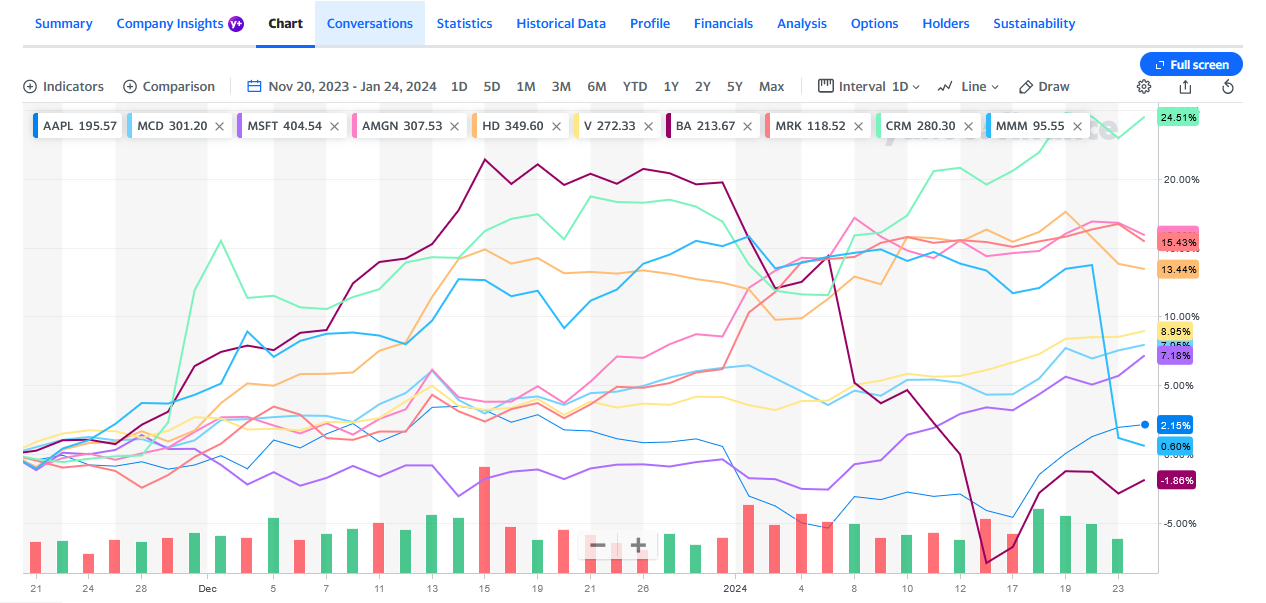

In [11]:

# As you can see in the image below, 9 of the top 10 recommended securities to invest in, were up in the past 2 months
# Admittedly, the last 2 months is an arbitrary time period, but plausable nonetheless, as you would probably look back
# in time for a few months, with more weight given to what happened more recently (1-3 months), and less weight given to 
# what happened in the distant past (6+ months back). If we look back 3 months, all 10 stocks were up. If we look back 
# 6 months, 9 of the 10  stocks were up.

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "1.JPG")


In [ ]:

#  Why would we rank stocks by these financial metrics?
# 'PE', 'PEG', 'PS', 'PB', 'EPS (ttm)'

#  P/E Ratio (Price-to-Earnings):
#    Purpose: Measures the valuation of a company relative to its earnings.
#    Calculation: P/E=Stock PriceEarnings Per Share (EPS)P/E=Earnings Per Share (EPS)Stock Price​
#    Interpretation: A lower P/E ratio may indicate a potentially undervalued stock, while a higher P/E may suggest overvaluation. It is widely used for comparing the relative value of different stocks.

#  PEG Ratio (Price/Earnings to Growth):
#    Purpose: Adjusts the P/E ratio for expected future earnings growth.
#    Calculation: PEG=P/E RatioAnnual Earnings Growth RatePEG=Annual Earnings Growth RateP/E Ratio​
#    Interpretation: A PEG ratio below 1 may indicate that the stock is undervalued given its growth prospects. It helps assess the stock's valuation while considering its earnings growth potential.

#  PS Ratio (Price-to-Sales):
#    Purpose: Measures a company's valuation relative to its revenue.
#    Calculation: PS=Stock PriceRevenue Per SharePS=Revenue Per ShareStock Price​
#    Interpretation: A lower PS ratio may indicate a potentially undervalued stock, especially for companies with strong revenue growth. It is useful when earnings are not a reliable metric.

#  PB Ratio (Price-to-Book):
#    Purpose: Measures a company's valuation relative to its net assets.
#    Calculation: PB=Stock PriceBook Value Per SharePB=Book Value Per ShareStock Price​
#    Interpretation: A PB ratio below 1 may suggest that the stock is undervalued compared to its book value. It is often used for evaluating financial companies.

#  EPS (Earnings Per Share):
#    Purpose: Represents a company's profit allocated to each outstanding share of common stock.
#    Calculation: EPS=Net IncomeNumber of Outstanding SharesEPS=Number of Outstanding SharesNet Income​
#    Interpretation: Higher EPS indicates higher profitability on a per-share basis. Investors often look for consistent growth in EPS over time.

# By ranking stocks based on these financial metrics, investors and analysts can identify potential investment 
# opportunities, assess relative valuations, and compare stocks within the same industry or sector. However, it's 
# important to note that these metrics should be used in conjunction with other fundamental and qualitative factors 
# to make well-informed investment decisions. Additionally, market conditions and industry dynamics should be considered 
# for a comprehensive analysis.
